## 07-08 케라스(Keras) 훑어보기

### 전처리(Preprocessing)

Tokenizer(): 토큰화, 정수 인코딩

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
train_text = "The earth is an awesome place live"

# 단어 집합 생성
tokenizer.fit_on_texts([train_text])

# 정수 인코딩
sub_text = "The earth is an great place live"
sequences = tokenizer.texts_to_sequences([sub_text])[0]

# 출력 결과를 보면 great는 단어 집합(vocabulary)에 없으므로 출력되지 않습니다.
print("정수 인코딩 : ",sequences)
print("단어 집합 : ",tokenizer.word_index)

정수 인코딩 :  [1, 2, 3, 4, 6, 7]
단어 집합 :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


pad_sequence(): (모델의 입력으로 사용하려면 모든 샘플의 길이를 동일하게 맞추어야할 때가 있으므로) 해준 길이보다 길이가 긴 샘플은 값을 일부 자르고, 정해준 길이보다 길이가 짧은 샘플은 값을 0으로 채움

In [4]:
# 첫번째 인자 = 패딩을 진행할 데이터
# maxlen = 모든 데이터에 대해서 정규화 할 길이
# padding = 'pre'를 선택하면 앞에 0을 채우고 'post'를 선택하면 뒤에 0을 채움
pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='pre')

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]])

### 워드 임베딩(Word Embedding)

워드 임베딩: 텍스트 내의 단어들 -> 밀집 벡터(dense vector)  
임베딩 벡터는 초기에는 랜덤값을 가지지만, 인공 신경망의 가중치가 학습되는 방법과 같은 방식으로 값이 학습되며 변경됩니다.

원-핫 벡터는 단어 집합의 크기만큼 벡터의 차원을 가지며 단어 벡터 간의 유의미한 유사도를 구할 수 없다는 단점이 있습니다. 반면 워드 임베딩으로부터 얻은 임베딩 벡터는 상대적으로 저차원을 가지며 모든 원소의 값이 실수입니다.  
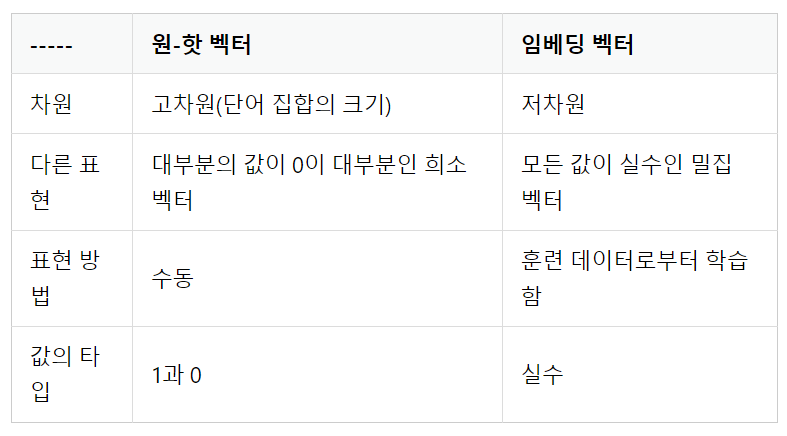

Embedding(): 단어를 밀집 벡터로 만드는 역할을 합니다. 인공 신경망 용어로는 임베딩 층(embedding layer)을 만드는 역할을 합니다.  
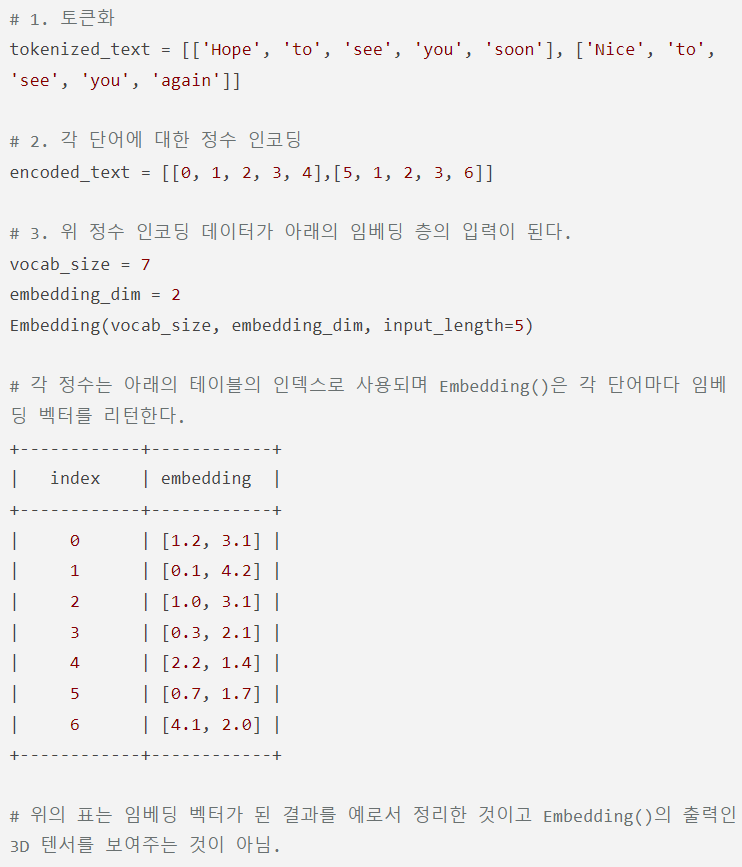

### 모델링(Modeling)

Sequential(): 케라스에서는 입력층, 은닉층, 출력층을 구성하기 위해 Sequential()을 사용합니다. Sequential()을 model로 선언한 뒤에 model.add()라는 코드를 통해 층을 단계적으로 추가합니다.  
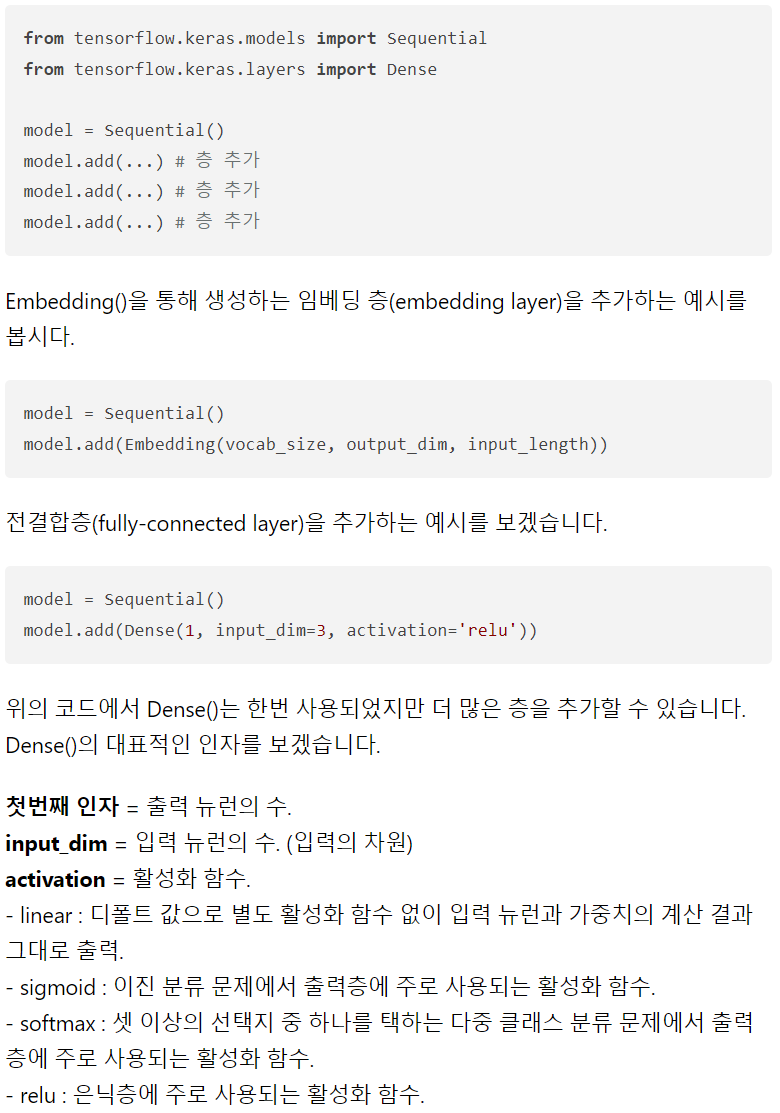

summary() : 모델의 정보를 요약해서 보여줍니다.  
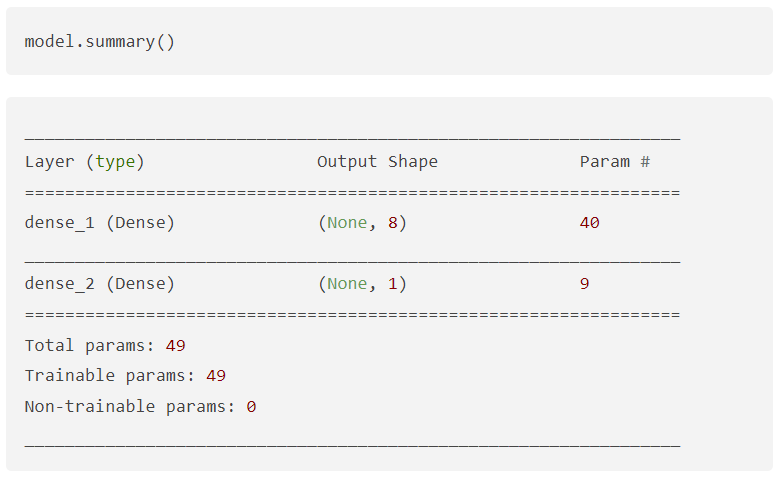

### 컴파일(Compile)과 훈련(Training)

compile(): 모델을 기계가 이해할 수 있도록 컴파일 합니다. 손실 함수와 옵티마이저, 메트릭 함수를 선택합니다.  
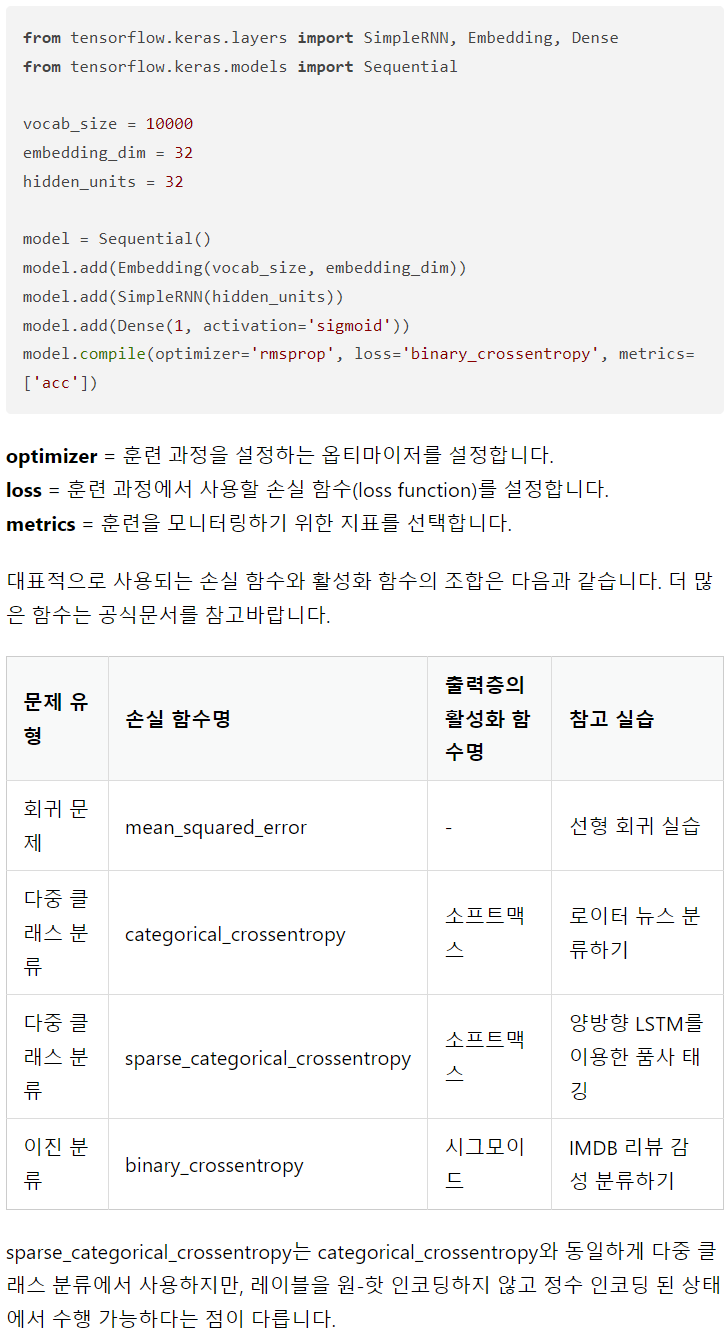

fit(): 모델이 오차로부터 매개 변수를 업데이트 시키는 과정을 학습, 훈련, 또는 적합(fitting)이라고 하는데, 모델이 데이터에 적합해가는 과정이기 때문입니다. 그런 의미에서 fit()은 모델의 훈련을 시작합니다.  
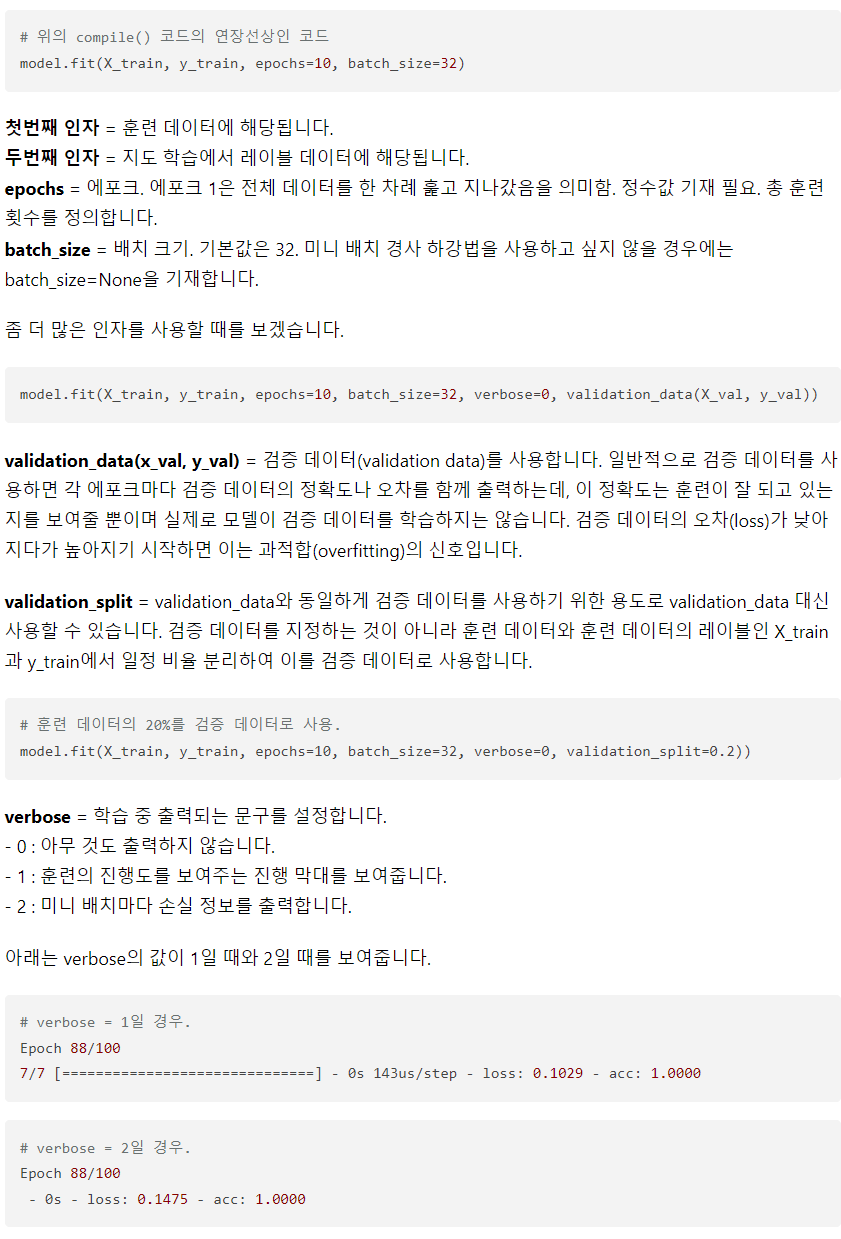

### 평가(Evaluation)와 예측(Prediction)

evaluate() : 테스트 데이터를 통해 학습한 모델에 대한 정확도를 평가합니다.  
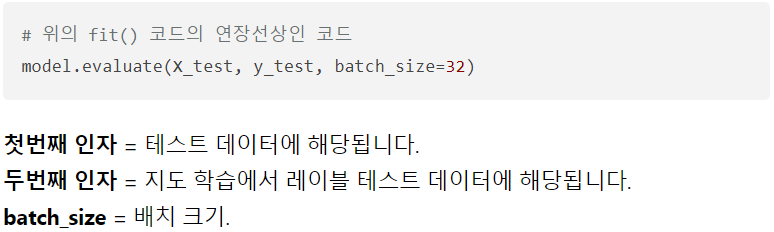

predict() : 임의의 입력에 대한 모델의 출력값을 확인합니다.  
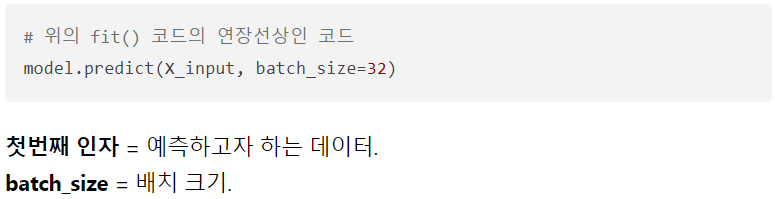

### 모델의 저장(Save)과 로드(Load)

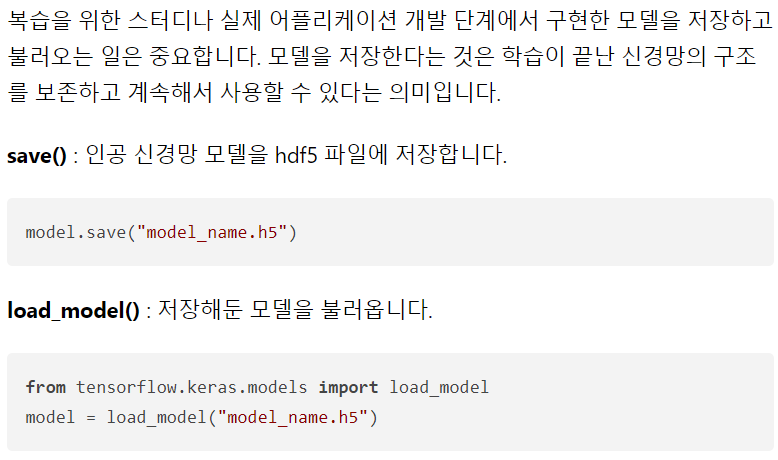